In [255]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from google.colab import drive
from scipy import stats

warnings.filterwarnings('ignore')
drive.mount('/content/gdrive')
#Setup Enviornment 

DATASET_PATH = "/content/gdrive/MyDrive/Estudos/Pos-graduacao - Ciencia de Dados e  Analytics/Sprints/sprint I - Analise de salarios cientista de dados/data_science_job_market_analysis/Dataset"
os.chdir(DATASET_PATH)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Cleaning Jobs_Description Database

## A preliminar View

In [256]:
jobs_description__kaggle_df = pd.read_csv("Jobs_descriptions_EUA/2023-data-scientists-jobs-descriptions.csv")
jobs_description__glassdoor_df = pd.read_csv("Jobs_descriptions_EUA/DataScientist_glassdoor.csv")

In [257]:
jobs_description__kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    790 non-null    int64 
 1   title         790 non-null    object
 2   company       790 non-null    object
 3   announcement  790 non-null    object
 4   description   790 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.0+ KB


In [258]:
jobs_description__kaggle_df.head(10)

,Unnamed: 0,title,company,announcement,description
0,0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,3,Data Science Intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,4,Data Scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."
5,5,Senior Solutions Architect (Data Science),The Trade Desk,LinkedIn,The Trade Desk is a global technology company ...
6,6,Senior Data Scientist,Tango Card,Startup Jobs,The JobTango Card is hiring our first ever Sen...
7,7,"Data Scientist - Research, Development & Const...",HFR,LinkedIn,"Company Description: HFR, Inc. (HFR) was found..."
8,8,Data Science Manager - S&A Strategy,Deloitte,Mendeley,"Data Science Manager SFL Scientific, a Deloit..."
9,9,Senior/Principal Data Scientist,Lumicity,LinkedIn,Senior Data Scientist AND Principal Data Scien...


In [259]:
jobs_description__glassdoor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

## Simplifying Job roles by map repalce on kaggle dataset

In [260]:
map = pd.read_csv("Jobs_descriptions_EUA/job_role_mapping/mapa_job_roles_kaggle.csv", delimiter=';')[['Original','Simplyfied']]#.set_index('Original')
map['Original'] = map['Original'].str.strip()
#map = map.set_index("Original").to_dict()

In [261]:
pd.DataFrame(jobs_description__kaggle_df[['title']].replace(map).value_counts())

,0
title,
Data Scientist,80
Data Analyst,69
Senior Data Scientist,28
Senior Data Analyst,22
Business Data Analyst,12
...,...
Data Science Internship,1
Data Science Intern - Summer 2023,1
Data Science Fraud Manager,1


In [262]:
DATA_SCIENCE_JOBS= ["DATA SCIENTIST","DATA ENGINEER","DATA ANALYST","DATA ARCHITECT","BI ANALYST","BUSINESS ANALYST","STATISTICIAN", "DATA ANALYTICS","DATA SPECIALIST", "DATA SCIENCE","DATA ANALYSIS","ANALYST", "ANALYTICS","DATA MANAGEMENT SPECIALIST","BUSINESS ANALYSIS"]


jobs_description__kaggle_df_clean = jobs_description__kaggle_df


for job in DATA_SCIENCE_JOBS:
  jobs_description__kaggle_df_clean['title']  = jobs_description__kaggle_df_clean['title'].str.upper()
  jobs_description__kaggle_df_clean.loc[jobs_description__kaggle_df_clean['title'].str.contains(job), 'title'] = job

In [263]:
map = {
    "BUSINESS ANALYSIS": "DATA ANALYST",
     "DATA ANALYTICS": "DATA ANALYST",
     "DATA ANALYSIS": "DATA ANALYST",
     "DATA SCIENCE" : "DATA SCIENTIST",
     "ANALYST": "DATA ANALYST",
     "DATA MANAGEMENT SPECIALIST": "DATA SPECIALIST",
     "ANALYTICS":"DATA ANALYST"

}

In [264]:
pd.DataFrame(jobs_description__kaggle_df[['title']].replace(map).value_counts())[pd.DataFrame(jobs_description__kaggle_df[['title']].replace(map).value_counts())  < 2].reset_index()['title']

0                                         DATA ANALYST
1                                       DATA SCIENTIST
2                                      DATA SPECIALIST
3                                        DATA ENGINEER
4                                        POLICY INTERN
5    RISA20220808-OP028 CYBER SECURITY OPERATIONS S...
6           SENIOR DATA GOVERNANCE SPECIALIST (REMOTE)
7    SENIOR/PRINCIPAL SCIENTIST- VISUALIZATION AND ...
Name: title, dtype: object

In [265]:
jobs_description__kaggle_df_clean['title'] = jobs_description__kaggle_df_clean['title'].replace(map)
value_counts = pd.DataFrame(jobs_description__kaggle_df_clean['title'].value_counts(), )
value_counts = value_counts.reset_index()
value_counts.columns = ['title','freq'] 


useless_jobs = list(value_counts[ value_counts.iloc[:,1] < 2].iloc[:, 0])
#jobs_description__kaggle_df_clean = jobs_description__kaggle_df_clean[ jobs_description__kaggle_df_clean['title'].all() not in useless_jobs]

to_remove = value_counts[ value_counts['freq'] < 2]['title']
jobs_description__kaggle_df_clean[  ~jobs_description__kaggle_df_clean['title'].isin(to_remove)  ]['title'].value_counts()


#irrelevant_jobs = 

#jobs_description__kaggle_df_clean.loc[  ~jobs_description__kaggle_df_clean['title'].isin(to_remove) ]

DATA ANALYST       432
DATA SCIENTIST     327
DATA SPECIALIST     23
DATA ENGINEER        4
Name: title, dtype: int64

In [266]:
# The test has worked so:
jobs_description__kaggle_df_clean = jobs_description__kaggle_df_clean[  ~jobs_description__kaggle_df_clean['title'].isin(to_remove)  ]


In [267]:
jobs_description__kaggle_df_clean

,Unnamed: 0,title,company,announcement,description
0,0,DATA SCIENTIST,TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,1,DATA SCIENTIST,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,2,DATA SCIENTIST,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,3,DATA SCIENTIST,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,4,DATA SCIENTIST,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."
...,...,...,...,...,...
785,785,DATA SPECIALIST,GovernmentJobs.com,Learn4Good.com,"Description $3,000 hiring bonus to join the J..."
786,786,DATA SPECIALIST,Metrocare Services,Glassdoor,Are you looking for a purpose-driven career? A...
787,787,DATA ANALYST,Gopuff,Startup Jobs,The Senior Data Analyst will join as an analyt...
788,788,DATA ANALYST,Petroplan,Petroplan,Overview: The Cost Controller / Data Analyst p...


## Cleaning Glassdoor

In [268]:
jobs_description__glassdoor_df

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


In [269]:
jobs_description__glassdoor_df_clean = jobs_description__glassdoor_df = jobs_description__glassdoor_df.replace('-1', 'unknown')
jobs_description__glassdoor_df_clean = jobs_description__glassdoor_df.replace('-1', 'unknown')
jobs_description__glassdoor_df_clean = jobs_description__glassdoor_df.replace(' -1', 'unknown')
jobs_description__glassdoor_df_clean = jobs_description__glassdoor_df.replace('Unknown', 'unknown')

In [270]:
jobs_description__glassdoor_df_clean

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,unknown,unknown
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,unknown,unknown
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,unknown,unknown,unknown,Unknown / Non-Applicable,unknown,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",unknown
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),unknown,unknown
3905,3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),unknown,unknown
3906,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),unknown,unknown
3907,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),unknown,unknown


## Map Replace on Glassdoor

In [271]:
DATA_SCIENCE_JOBS= ["DATA SCIENTIST","DATA ENGINEER","DATA ANALYST","DATA ARCHITECT","BI ANALYST","BUSINESS ANALYST","STATISTICIAN", "DATA ANALYTICS","DATA SPECIALIST", "DATA SCIENCE","DATA ANALYSIS","ANALYST", "ANALYTICS","DATA MANAGEMENT SPECIALIST","BUSINESS ANALYSIS", "MACHINE LEARNING ENGINEER", "RESEARCH","SOFTWARE ENGINEER","MACHINE LEARNING SCIENTIST","ASSOCIATE SCIENTIST", "DATA MODELER"]





for job in DATA_SCIENCE_JOBS:
  jobs_description__glassdoor_df_clean['Job Title']  = jobs_description__glassdoor_df_clean['Job Title'].str.upper()
  jobs_description__glassdoor_df_clean.loc[jobs_description__glassdoor_df_clean['Job Title'].str.contains(job), 'Job Title'] = job

In [272]:
map = {
    "BUSINESS ANALYSIS": "DATA ANALYST",
     "DATA ANALYTICS": "DATA ANALYST",
     "DATA ANALYSIS": "DATA ANALYST",
     "DATA SCIENCE" : "DATA SCIENTIST",
     "ANALYST": "DATA ANALYST",
     "DATA MANAGEMENT SPECIALIST": "DATA SPECIALIST",
     "ANALYTICS":"DATA ANALYST",
     "RESEARCH": "RESEARCHER",
     "MACHINE LEARNING SCIENTIST": "RESEARCHER",
     "DATA ENGINEER I": "DATA ENGINEER",
     "DATA ENGINEER II": "DATA ENGINEER",
     "DATA ENGINEER III": "DATA ENGINEER",
     "DATA ANALYST I":"DATA ANALYST",
     "DATA ANALYST II":"DATA ANALYST",
     "DATA ANALYST III":"DATA ANALYST",
     "DATA ANALYST JUNIOR":"DATA ANALYST",
     "DATA ARCHITECT II": "DATA ARCHITECT",
     "DATA ARCHITECT I": "DATA ARCHITECT",
     "DATA ARCHITECT III": "DATA ARCHITECT",
     "MARKETING DATA ANALYST": "DATA ANALYST",
     "DATA ENGINEER (REMOTE)": "DATA ENGINEER",
     "CLOUD DATA ENGINEER": "DATA ENGINEER",
     "SR. DATA ENGINEER": "DATA ENGINEER",
     "BUSINESS DATA ANALYST	": "DATA ANALYST",
     "SR. DATA ANALYST": "DATA ANALYST",
     "SENIOR MACHINE LEARNING ENGINEER": "MACHINE LEARNING ENGINEER",
     "DATA SCIENTIST (REMOTE)": "DATA SCIENTIST",
     "DATA SCIENTIST I": "DATA SCIENTIST",
     "DATA SCIENTIST II": "DATA SCIENTIST",
     "DATA SCIENTIST III": "DATA SCIENTIST",
     "AWS DATA ENGINEER":"DATA ENGINEER",
     "AZURE DATA ENGINEER":"DATA ENGINEER",
     "DATA SCIENCE ENGINEER":"DATA SCIENTIST",
     "MACHINE LEARNING ENGINEER (IMAGING)": "MACHINE LEARNING ENGINEER",
     #"DATA ANALYSIS": "DATA ANALYST",
     "MACHINE LEARNING SCIENTIST":"RESEARCHER"



}

In [273]:
jobs_description__glassdoor_df_clean[['Job Title']] = jobs_description__glassdoor_df_clean[['Job Title']].replace(map)
value_counts = pd.DataFrame(jobs_description__glassdoor_df_clean[['Job Title']].replace(map).value_counts()).reset_index()
value_counts.columns = ['value','freq']
value_counts

,value,freq
0,DATA SCIENTIST,1151
1,DATA ANALYST,988
2,DATA ENGINEER,742
3,RESEARCHER,217
4,MACHINE LEARNING ENGINEER,108
...,...,...
493,LABORATORY SCIENTIST II,1
494,LABORATORY SCIENTIST 3,1
495,JPSC-6511 - BIG DATA CONSULTANT,1
496,INVESTIGATIONAL COMPUTATIONAL BIOLOGIST,1


In [274]:
useless_jobs = value_counts
to_remove = value_counts[ value_counts['freq'] < 108]['value']
jobs_description__glassdoor_df_clean = jobs_description__glassdoor_df_clean[  ~jobs_description__glassdoor_df_clean['Job Title'].isin(to_remove)  ]

In [275]:
jobs_description__glassdoor_df_clean['Job Title'].value_counts()

DATA SCIENTIST               1151
DATA ANALYST                  988
DATA ENGINEER                 742
RESEARCHER                    217
MACHINE LEARNING ENGINEER     108
Name: Job Title, dtype: int64

In [276]:
jobs_description__glassdoor_df_clean.head(20)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,DATA SCIENTIST,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,unknown,unknown
1,1,1,DATA SCIENTIST,$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,unknown,unknown
2,2,2,DATA SCIENTIST,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,unknown,unknown,unknown,Unknown / Non-Applicable,unknown,True
3,3,3,DATA ANALYST,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",unknown
4,4,4,DATA SCIENTIST,$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",unknown
5,5,5,DATA SCIENTIST,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies\n2.9,"New York, NY","Hartford, CT",201 to 500 employees,1985,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,"Colony Specialty, Markel, RLI",unknown
6,6,6,RESEARCHER,$111K-$181K (Glassdoor est.),Experience: Entry-level (PhD Program) or Exper...,4.4,PDT Partners\n4.4,"New York, NY","New York, NY",51 to 200 employees,1993,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,unknown,unknown
7,7,7,RESEARCHER,$111K-$181K (Glassdoor est.),Seeking a quant to work with senior researcher...,-1.0,Enlightenment Research,"New York, NY","New York, NY",1 to 50 employees,-1,unknown,unknown,unknown,Unknown / Non-Applicable,unknown,True
9,9,9,RESEARCHER,$111K-$181K (Glassdoor est.),"About the Position\n\n\nAt Jane Street, we con...",4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,unknown,unknown
10,10,10,DATA SCIENTIST,$111K-$181K (Glassdoor est.),Company Description:\n\nQuartet is a pioneerin...,3.9,Quartet Health\n3.9,"New York, NY","New York, NY",201 to 500 employees,2014,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,unknown,True


## Quick Insight

['#924D51', '#61759B', '#D47408', '#939BB6', '#F05882', '#60D48E', '#E24D11', '#77D11B', '#88DE9C', '#AB2631', '#A5C315', '#5E7704', '#9E13E5', '#98D0B4', '#39FC94', '#FC0AAC', '#F504CD', '#9BBD66', '#998715', '#C85AE6', '#1875C5', '#42BCA5', '#D6D574', '#8BF83E', '#B9A44F', '#14B5A3']


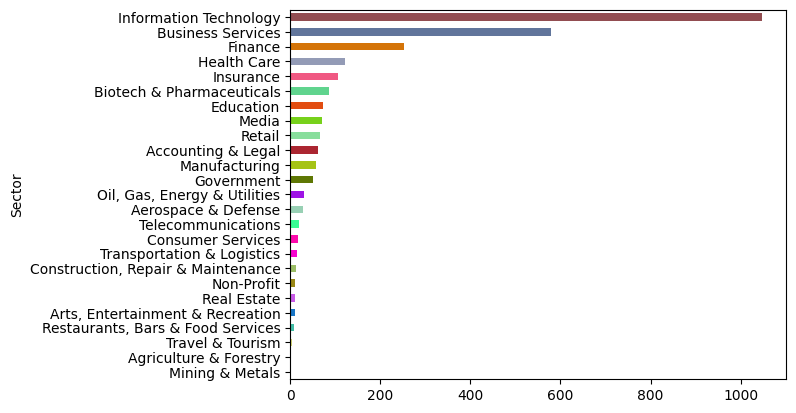

In [315]:
import random

# Generate 26 random hex colors and store them in a list
color_list = []
for i in range(26):
    color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    color_list.append(color)

# Print the list of colors
print(color_list)
sector_counts = pd.DataFrame(jobs_description__glassdoor_df_clean['Sector'].value_counts()).reset_index()
sector_counts.columns = ['Sector','freq']
sector_counts = sector_counts[sector_counts['Sector']!= 'unknown']
ax = sector_counts.plot(kind='barh', x='Sector', y='freq', legend=None, color = color_list)
ax.invert_yaxis()

# DONE!!!!